Kanyao Han         
MACS 30100


# PS 7

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from pylab import rcParams
import warnings
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore") 
%matplotlib inline

F:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Preparation

In [2]:
auto = pd.read_csv('Auto.csv', na_values='?')
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [3]:
auto = auto.dropna()
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
auto = auto.drop(['name'], 1)
auto['horsepower'] = auto['horsepower'].convert_objects(convert_numeric = True)
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= auto['mpg'].median() else 0).astype('category')

In [5]:
Xvars = auto[['cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'year', 'origin']].values
yvals = auto['mpg_high'].values

## a) Logistic Regression

In [6]:
k = 4
kf = KFold(n_splits=k, random_state=15, shuffle=True)
kf.get_n_splits(Xvars)
LogGeneral_error_0 = np.zeros(k)
LogGeneral_error_1 = np.zeros(k)
LogGeneral_MSE = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('When k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(fit_intercept=True)
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    error = y_test != y_pred
    error_all_class = error.mean()
    error_0 = ((y_pred == 0) * error).sum() / (y_pred == 0).sum() 
    error_1 = ((y_pred == 1) * error).sum() / (y_pred == 1).sum() 
    LogGeneral_error_0[k_ind] = error_0
    LogGeneral_error_1[k_ind] = error_1
    LogGeneral_MSE[k_ind] = error_all_class
    print('\n',classification_report(y_test, y_pred, digits=3))
    print('error rate (category 0) is', error_0,
          ', error rate (category 1) is', error_1)
    print('The MSE of the model is', error_all_class)
    print()
    k_ind += 1


print('\nk-fold resuts:')
print('The average error rate (category 0) is', LogGeneral_error_0.mean(), ', std is', LogGeneral_error_0.std())
print('The average error rate (category 1) is', LogGeneral_error_1.mean(), ', std is', LogGeneral_error_1.std())
print('The average MSE of the model is', LogGeneral_MSE.mean(), ', std is', LogGeneral_MSE.std())

When k index= 0

              precision    recall  f1-score   support

          0      0.942     0.891     0.916        55
          1      0.870     0.930     0.899        43

avg / total      0.910     0.908     0.908        98

error rate (category 0) is 0.057692307692307696 , error rate (category 1) is 0.13043478260869565
The MSE of the model is 0.09183673469387756

When k index= 1

              precision    recall  f1-score   support

          0      0.878     0.915     0.896        47
          1      0.918     0.882     0.900        51

avg / total      0.899     0.898     0.898        98

error rate (category 0) is 0.12244897959183673 , error rate (category 1) is 0.08163265306122448
The MSE of the model is 0.10204081632653061

When k index= 2

              precision    recall  f1-score   support

          0      0.848     0.867     0.857        45
          1      0.885     0.868     0.876        53

avg / total      0.868     0.867     0.867        98

error rate (catego

## b) Random Forest

In [7]:
RF = RandomForestClassifier(n_estimators=20, max_features=2, bootstrap=True,
                           oob_score=True, random_state=25)

RF.fit(Xvars, yvals)
Decision = RF.oob_decision_function_

#### <span style="color:red">Coding Technique</span>
<span style="color:red"> Since RandomForestClassifier does not have the attribute ".oob_prediction", I use "oob decision function" to calculate the OOB prediction. It is worth noting that when we use the "oob decision function", we must transform some decimal values as 1 or 0.

In [8]:
# Get oob prediction
oob_prediction = Decision.T[1]

In [9]:
MSE_RF = pd.DataFrame({'pred' : oob_prediction, 'yvals': yvals})

In [10]:
# Transform it as binary category
MSE_RF['pred'] = MSE_RF['pred'].apply(lambda x: 1 if x >= 0.5 else 0)

In [11]:
MSE_all = mean_squared_error(MSE_RF['yvals'], MSE_RF['pred'])

In [12]:
MSE_RF_0 = MSE_RF[MSE_RF['pred'] < 0.5]
MSE_0 = mean_squared_error(MSE_RF_0['yvals'], MSE_RF_0['pred'])

In [13]:
MSE_RF_1 = MSE_RF[MSE_RF['pred'] >= 0.5]
MSE_1 = mean_squared_error(MSE_RF_1['yvals'], MSE_RF_1['pred'])
print('The error rate for category 0 is', MSE_0)
print('The error rate for category 1 is', MSE_1)
print('The MSE of the model is', MSE_all)

The error rate for category 0 is 0.05789473684210526
The error rate for category 1 is 0.08415841584158416
The MSE of the model is 0.07142857142857142


## c) SVM

In [14]:
k = 4
kf = KFold(n_splits=k, random_state=15, shuffle=True)
kf.get_n_splits(Xvars)
SVMGeneral_error_0 = np.zeros(k)
SVMGeneral_error_1 = np.zeros(k)
SVMGeneral_MSE = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('When k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    svc = svm.SVC(kernel='rbf', gamma = 0.2, C=1)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    error = y_test != y_pred
    error_all_class = error.mean()
    error_0 = ((y_pred == 0) * error).sum() / (y_pred == 0).sum() 
    error_1 = ((y_pred == 1) * error).sum() / (y_pred == 1).sum()
    SVMGeneral_error_0[k_ind] = error_0
    SVMGeneral_error_1[k_ind] = error_1
    SVMGeneral_MSE[k_ind] = error_all_class

    print('\n',classification_report(y_test, y_pred, digits=3))
    if (y_pred == 0).sum() != 0:
        print('error rate (category 0) is', error_0)
    else:
        print('error rate (category 0): NA (all predicted values are 1)')
    
    if (y_pred == 1).sum() != 0:
        print('error rate (category 1) is', error_1)
    else:
        print('error rate (category 1): NA (all predicted values are 0)')
    
    print('The MSE of the model is', error_all_class)
    print()
    k_ind += 1


print('\nk-fold resuts:')
SVMGeneral_error_0 = SVMGeneral_error_0[~np.isnan(SVMGeneral_error_0)]
print('The average error rate (category 0) is', SVMGeneral_error_0.mean(), ', std is', SVMGeneral_error_0.std())
SVMGeneral_error_1 = SVMGeneral_error_1[~np.isnan(SVMGeneral_error_1)]
print('The average error rate (category 1) is', SVMGeneral_error_1.mean(), ', std is', SVMGeneral_error_1.std())
print('The average MSE of the model is', SVMGeneral_MSE.mean(), ', std is', SVMGeneral_MSE.std())

When k index= 0

              precision    recall  f1-score   support

          0      1.000     0.036     0.070        55
          1      0.448     1.000     0.619        43

avg / total      0.758     0.459     0.311        98

error rate (category 0) is 0.0
error rate (category 1) is 0.5520833333333334
The MSE of the model is 0.5408163265306123

When k index= 1

              precision    recall  f1-score   support

          0      0.480     1.000     0.648        47
          1      0.000     0.000     0.000        51

avg / total      0.230     0.480     0.311        98

error rate (category 0) is 0.5204081632653061
error rate (category 1): NA (all predicted values are 0)
The MSE of the model is 0.5204081632653061

When k index= 2

              precision    recall  f1-score   support

          0      0.469     1.000     0.638        45
          1      1.000     0.038     0.073        53

avg / total      0.756     0.480     0.332        98

error rate (category 0) is 0.5312

#### <span style="color:red">Coding Technique</span>
<span style="color:red"> Since this SVM model is very bad, sometimes all predicted values for each category will be 1 or 0. It will bring value of **nan** when we caculate error rates for category 1 or 0. Therefore, I write an "if statement" in K-fold, and remove the value of **nan** (if any) when I caclulate the average error rates. 

## d) Comparison        


In [15]:
Logit_MSE = [LogGeneral_MSE.mean(), LogGeneral_error_0.mean(), LogGeneral_error_1.mean()]
RF_MSE = [MSE_all, MSE_0, MSE_1]
SVM_MSE = [SVMGeneral_MSE.mean(), SVMGeneral_error_0.mean(), SVMGeneral_error_1.mean()]
Index = ["Model MSE", "Category 0", "Category 1"]
Com = pd.DataFrame({'Logit':Logit_MSE, 'RF':RF_MSE, 'SVM':SVM_MSE},
                       index = Index)
Com.reset_index(inplace=True)
Com

,index,Logit,RF,SVM
0,Model MSE,0.107143,0.071429,0.507653
1,Category 0,0.094707,0.057895,0.381194
2,Category 1,0.118227,0.084158,0.184028


Text(0,0.5,'Error Rate/MSE')

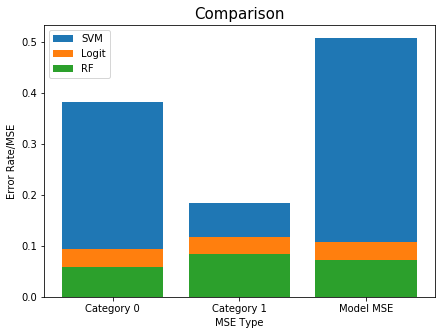

In [16]:
plt.figure(figsize=(7,5))
plt.bar(Com['index'], Com['SVM'], label='SVM')
plt.bar(Com['index'], Com['Logit'], label='Logit')
plt.bar(Com['index'], Com['RF'], label='RF')
plt.legend(loc='upper left')
plt.title('Comparison', fontsize = 15)
plt.xlabel('MSE Type')
plt.ylabel("Error Rate/MSE")

<span style="color:blue"> According to the results from the three models, the random forest model has the lowest error rates for category 0, category 1 and all categories. **It is seemingly the best predictive model.** On the contrary, SVM model has the incredibly high error rates for all parts.
    
<span style="color:blue"> However, we must note that the MSEs in the random forest model are computed by OOB prediction and we don't use traditional cross-validation. OOB MSEs are based on bootstrap aggregation so that the MSEs computed in this way would typically be lower than those in traditional cross-validation. Since the OOB MSEs are usually strongly positively correlated with the cross-validation MSEs, we can use them to select models if and only if all selections are based on OOB MSEs. Therefore, it is not suitable to directly compare cross-validation MSEs and OOB MSEs, especially in the situation where the OOB MSEs of one model are not much larger than the cross-validation MSEs of another model. Therefore, the random forest model is probably, but not necessairly, better than the logistic model.